In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Check data type

In [4]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

check number of unique value for object datatype for boolean or categorical conversion

In [5]:
{col : df[col].unique() for col in df if df[col].dtype == object}

{'v1': array(['ham', 'spam'], dtype=object),
 'v2': array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
        'Ok lar... Joking wif u oni...',
        "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
        ..., 'Pity, * was in mood for that. So...any other suggestions?',
        "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
        'Rofl. Its true to its name'], dtype=object),
 'Unnamed: 2': array([nan, ' PO Box 5249',
        ' the person is definitely special for u..... But if the person is so special',
        ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""',
        ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"',
        'this wont even start........ Datz confidence.."', 'GN',
        '.;-):-D"',
   

In [6]:
df = df.astype(
    {
        'v1' : 'category',
        'v2' : 'category',
        'Unnamed: 2' : 'category',
        'Unnamed: 3' : 'category',
        'Unnamed: 4' : 'category'
    }
)

In [7]:
df.dtypes

v1            category
v2            category
Unnamed: 2    category
Unnamed: 3    category
Unnamed: 4    category
dtype: object

Encode the "v1" column as 1 for "spam" and 0 for "ham"

In [8]:
df['v1'] = df['v1'].apply(lambda x: 1 if x == 'spam' else 0)

Describe

In [9]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,0,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


Missing Values Check

In [10]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

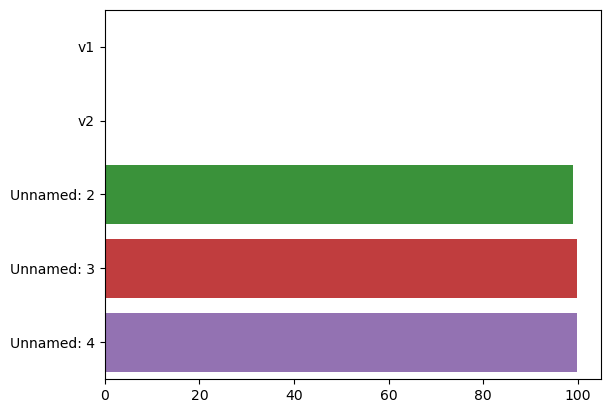

In [11]:
ax = sns.barplot(
    x=df.isna().sum() / df.shape[0]*100,
    y=df.columns  
)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   v1          5572 non-null   category
 1   v2          5572 non-null   category
 2   Unnamed: 2  50 non-null     category
 3   Unnamed: 3  12 non-null     category
 4   Unnamed: 4  6 non-null      category
dtypes: category(5)
memory usage: 204.3 KB


droping Unnamed: 2, Unnamed: 3 and Unnamed: 4

In [13]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [14]:
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


Create bar charts

In [15]:
spam_count = (df['v1'] == 1).sum()
ham_count = (df['v1'] == 0).sum()

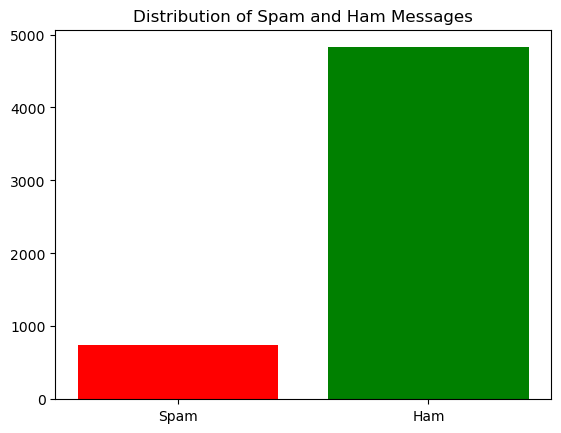

In [16]:
fig, ax = plt.subplots()
ax.bar(['Spam', 'Ham'], [spam_count, ham_count], color=['red', 'green'])
ax.set_title('Distribution of Spam and Ham Messages')
plt.show()

Modeling and Create a countvectorizer


Split the data into training and testing sets

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

Create a CountVectorizer object and fit it to the training data

In [18]:
# Create a CountVectorizer object and fit it to the training data
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(X_train)

CountVectorizer()

Transform the training and testing data into matrices of word counts

In [19]:
X_train_counts = cv.transform(X_train)
X_test_counts = cv.transform(X_test)

Train a machine learning model on the training data

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
lg = LogisticRegression()
lg.fit(X_train_counts, y_train)

LogisticRegression()

Evaluation

Make predictions on the testing data

In [23]:
y_pred = lg.predict(X_test_counts)

Calculate accuracy, precision, recall, and F1 score

In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [25]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.97847533632287
Precision: 1.0
Recall: 0.84
F1 score: 0.9130434782608696
